## Gram-Schmidt Procedure for Signals

Given a set of finite-energy signals $ \{s_m(t), m = 1, 2, ..., M\} $, the **Gram-Schmidt orthogonalization procedure** is used to construct an orthonormal set of waveforms.  

#### Initial Step: Normalize the First Signal  

Starting with the first signal $ s_1(t) $, with energy $ E_1 $:  

$$
\phi_1(t) = \frac{s_1(t)}{\sqrt{E_1}}
$$  

This creates the first orthonormal waveform $ \phi_1(t) $, which is $ s_1(t) $ normalized to unit energy.

#### The Next Step: Orthogonalize the Second Signal  

For the second signal $ s_2(t) $, compute its projection onto $ \phi_1(t) $:  

$$
c_{21} = \langle s_2(t), \phi_1(t) \rangle = \int_{-\infty}^{\infty} s_2(t) \phi_1^*(t) \, dt
$$  

Subtract this projection to create a signal orthogonal to $ \phi_1(t) $:  

$$
\gamma_2(t) = s_2(t) - c_{21} \phi_1(t)
$$  

Normalize $ \gamma_2(t) $ to obtain the second orthonormal waveform:  

$$
\phi_2(t) = \frac{\gamma_2(t)}{\sqrt{E_2}}
$$  

where $ E_2 = \int_{-\infty}^{\infty} |\gamma_2(t)|^2 dt $ is the energy of $ \gamma_2(t) $.


#### A General Step: Orthogonalization of the $ k $-th Signal  

For the $ k $-th signal $ s_k(t) $, compute:  

$$
\gamma_k(t) = s_k(t) - \sum_{i=1}^{k-1} c_{ki} \phi_i(t)
$$  

where:  

$$
c_{ki} = \langle s_k(t), \phi_i(t) \rangle = \int_{-\infty}^{\infty} s_k(t) \phi_i^*(t) \, dt
$$  

Normalize $ \gamma_k(t) $ to obtain the $ k $-th orthonormal waveform:  

$$
\phi_k(t) = \frac{\gamma_k(t)}{\sqrt{E_k}}
$$  

where $ E_k = \int_{-\infty}^{\infty} |\gamma_k(t)|^2 dt $.

**Resultant Orthogonal Set of Waveforms**  
This process continues for all $ M $ signals $ \{s_m(t)\} $, resulting in $ N \leq M $ orthonormal waveforms. These waveforms span the signal space defined by the original set.  

### Example: Applying the Gram-Schmidt Procedure to Rectangular Signals

We apply the Gram-Schmidt process to four rectangular signals $ s_1(t), s_2(t), s_3(t), $ and $ s_4(t) $, where:

$ s_1(t) = 
\begin{cases} 
1, & 0 \leq t \leq 2 \\
0, & \text{otherwise} 
\end{cases} $

$ s_2(t) = 
\begin{cases} 
1, & 0 \leq t \leq 1 \\
-1, & 1 < t \leq 2 \\
0, & \text{otherwise} 
\end{cases} $

$ s_3(t) = 
\begin{cases} 
1, & 0 \leq t \leq 2 \\
-1, & 2 < t \leq 3 \\
0, & \text{otherwise} 
\end{cases} $

$ s_4(t) = 
\begin{cases} 
-1, & 0 \leq t \leq 3 \\
0, & \text{otherwise} 
\end{cases} $

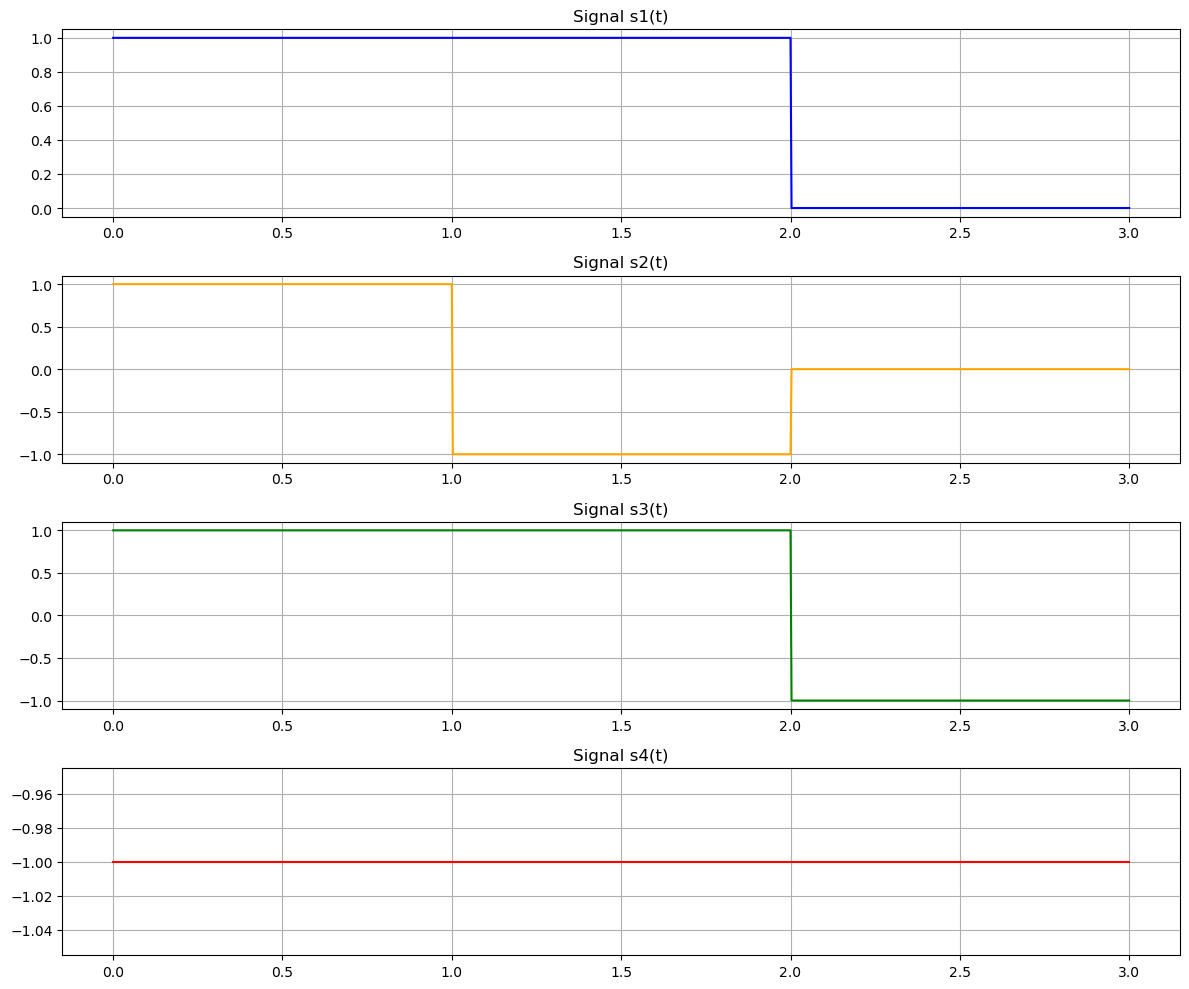

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define time range
t = np.linspace(0, 3, 1000)

# Define the given signals
s1 = np.where((t >= 0) & (t <= 2), 1, 0)
s2 = np.where((t >= 0) & (t <= 1), 1, np.where((t > 1) & (t <= 2), -1, 0))
s3 = np.where((t >= 0) & (t <= 2), 1, np.where((t > 2) & (t <= 3), -1, 0))
s4 = np.where((t >= 0) & (t <= 3), -1, 0)

# Plot original signals
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, s1, label="s1(t)", color="blue")
plt.title("Signal s1(t)")
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, s2, label="s2(t)", color="orange")
plt.title("Signal s2(t)")
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t, s3, label="s3(t)", color="green")
plt.title("Signal s3(t)")
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(t, s4, label="s4(t)", color="red")
plt.title("Signal s4(t)")
plt.grid()

plt.tight_layout()
plt.show()

##### Gram-Schmidt Procedure

**Step 1: Normalize $ s_1(t) $**

The energy of $ s_1(t) $ is:

$$
E_1 = \int_0^2 1^2 \, dt = 2
$$

The first orthonormal waveform is:

$$
\phi_1(t) = \frac{1}{\sqrt{2}} s_1(t)
$$

**Step 2: Orthogonalize $ s_2(t) $**

The projection coefficient $ c_{21} $ is:

$$
c_{21} = \langle s_2(t), \phi_1(t) \rangle = \int_0^2 s_2(t) \cdot \frac{1}{\sqrt{2}} \, dt = 0
$$

Since $ c_{21} = 0 $, $ s_2(t) $ and $ \phi_1(t) $ are orthogonal. The energy of $ s_2(t) $ is:

$$
E_2 = \int_0^1 1^2 \, dt + \int_1^2 (-1)^2 \, dt = 1 + 1 = 2
$$

The normalized second orthonormal waveform is:

$$
\phi_2(t) = \frac{1}{\sqrt{2}} s_2(t)
$$

**Step 3: Orthogonalize $ s_3(t) $**

The projection coefficients are:

$$
c_{31} = \langle s_3(t), \phi_1(t) \rangle = \int_0^2 s_3(t) \cdot \frac{1}{\sqrt{2}} \, dt = \sqrt{2}
$$

$$
c_{32} = \langle s_3(t), \phi_2(t) \rangle = \int_0^2 s_3(t) \cdot \frac{1}{\sqrt{2}} \, dt = 0
$$

The residual signal is:

$$
\gamma_3(t) = s_3(t) - c_{31} \phi_1(t) = 
\begin{cases} 
-1 & \text{if } 2 \leq t < 3 \\
0 & \text{otherwise}
\end{cases}
$$

The energy of $ \gamma_3(t) $ is:

$$
E_3 = \int_2^3 (-1)^2 \, dt = 1
$$

The normalized third orthonormal waveform is:

$$
\phi_3(t) = \gamma_3(t)
$$

**Step 4: Orthogonalize $ s_4(t) $**

The projection coefficients are:

$$
c_{41} = \langle s_4(t), \phi_1(t) \rangle = -\sqrt{2}, \quad c_{42} = \langle s_4(t), \phi_2(t) \rangle = 0, \quad c_{43} = \langle s_4(t), \phi_3(t) \rangle = 1
$$

The residual signal is:

$$
\gamma_4(t) = s_4(t) + c_{41} \phi_1(t) + c_{43} \phi_3(t) = 0
$$

Since $ \gamma_4(t) = 0 $, $ s_4(t) $ is a linear combination of $ \phi_1(t) $ and $ \phi_3(t) $. Thus:

$$
\phi_4(t) = 0
$$

**Final Results**

$ \phi_1(t) = \frac{1}{\sqrt{2}} s_1(t) $

$ \phi_2(t) = \frac{1}{\sqrt{2}} s_2(t) $

$ \phi_3(t) = \gamma_3(t) = 
   \begin{cases} 
   -1 & \text{if } 2 \leq t < 3 \\
   0 & \text{otherwise}
   \end{cases}
   $

$ \phi_4(t) = 0 $


The **final solution** in the form of case functions:

$ \phi_1(t) $ (Normalized $ s_1(t) $):

   $$
   \phi_1(t) = 
   \begin{cases} 
   \frac{1}{\sqrt{2}} & 0 \leq t \leq 2 \\
   0 & \text{otherwise}
   \end{cases}
   $$

$ \phi_2(t) $ (Normalized $ s_2(t) $):

   $$
   \phi_2(t) = 
   \begin{cases} 
   \frac{1}{\sqrt{2}} & 0 \leq t \leq 1 \\
   -\frac{1}{\sqrt{2}} & 1 < t \leq 2 \\
   0 & \text{otherwise}
   \end{cases}
   $$

$ \phi_3(t) $ (Orthogonalized $ s_3(t) $):

   $$
   \phi_3(t) = 
   \begin{cases} 
   0 & 0 \leq t \leq 2 \\
   -1 & 2 < t \leq 3 \\
   0 & \text{otherwise}
   \end{cases}
   $$

$ \phi_4(t) $ (Resulting residual signal from $ s_4(t) $):

   $$
   \phi_4(t) = 0
   $$


In [30]:
# Step-by-step calculation of orthonormal waveforms
phi1 = s1 / np.sqrt(np.trapz(s1**2, t))  # Normalize s1(t)
c21 = np.trapz(s2 * phi1, t)
gamma2 = s2 - c21 * phi1
phi2 = gamma2 / np.sqrt(np.trapz(gamma2**2, t))  # Normalize gamma2

c31 = np.trapz(s3 * phi1, t)
c32 = np.trapz(s3 * phi2, t)
gamma3 = s3 - c31 * phi1 - c32 * phi2
phi3 = gamma3 / np.sqrt(np.trapz(gamma3**2, t))  # Normalize gamma3

c41 = np.trapz(s4 * phi1, t)
c42 = np.trapz(s4 * phi2, t)
c43 = np.trapz(s4 * phi3, t)

gamma4 = s4 - c41 * phi1 - c42 * phi2 - c43 * phi3

# Tolerance threshold for gamma4
tolerance = 1e-6

# Recalculate gamma4 with the threshold applied
if np.sqrt(np.trapz(gamma4**2, t)) < tolerance:
    phi4 = np.zeros_like(t)
else:
    phi4 = gamma4 / np.sqrt(np.trapz(gamma4**2, t))

# Define theoretical results
phi1_theoretical = np.where((t >= 0) & (t <= 2), 1/np.sqrt(2), 0)
phi2_theoretical = np.where((t >= 0) & (t <= 1), 1/np.sqrt(2), np.where((t > 1) & (t <= 2), -1/np.sqrt(2), 0))
phi3_theoretical = np.where((t > 2) & (t <= 3), -1, 0)
phi4_theoretical = np.zeros_like(t)

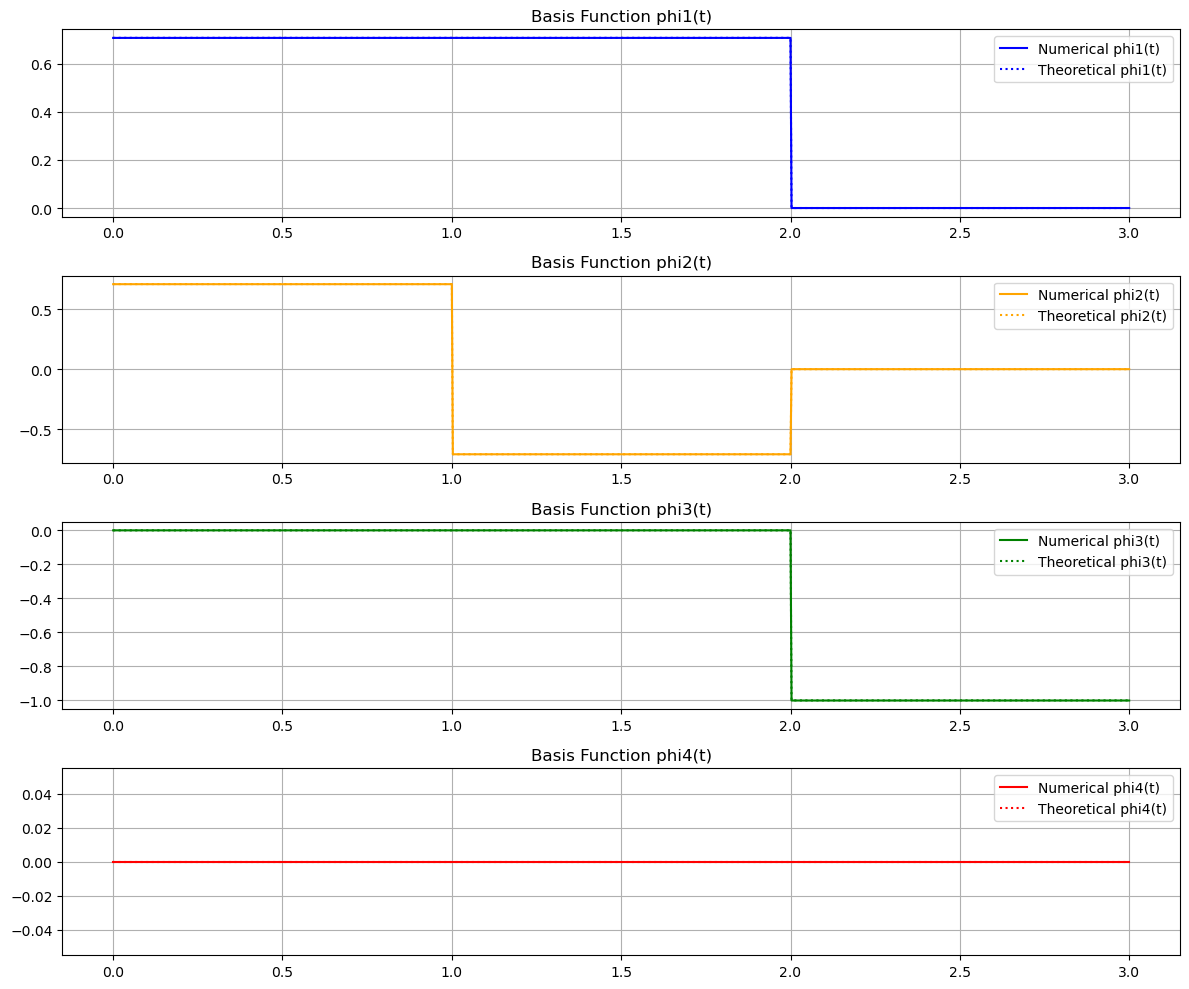

In [31]:
# Plot basis functions
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, phi1, label="Numerical phi1(t)", color="blue")
plt.plot(t, phi1_theoretical, label="Theoretical phi1(t)", linestyle=":", color="blue")
plt.title("Basis Function phi1(t)")
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, phi2, label="Numerical phi2(t)", color="orange")
plt.plot(t, phi2_theoretical, label="Theoretical phi2(t)", linestyle=":", color="orange")
plt.title("Basis Function phi2(t)")
plt.legend()
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t, phi3, label="Numerical phi3(t)", color="green")
plt.plot(t, phi3_theoretical, label="Theoretical phi3(t)", linestyle=":", color="green")
plt.title("Basis Function phi3(t)")
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(t, phi4, label="Numerical phi4(t)", color="red")
plt.plot(t, phi4_theoretical, label="Theoretical phi4(t)", linestyle=":", color="red")
plt.title("Basis Function phi4(t)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**DISCUSSION**

**Why $ \phi_4(t) $ is Zero: Linear Dependence Explained**

During the orthogonalization of $ s_4(t) $ against the orthonormal set $ \{\phi_1(t), \phi_2(t), \phi_3(t)\} $, $ \phi_4(t) $ was found to be zero (or effectively zero within numerical precision). This reflects the **linear dependence** among the signals.

**Linear Dependence Overview:**
- A set of functions is **linearly dependent** if one function can be expressed as a linear combination of others.
- If $ s_4(t) $ is a combination of $ s_1(t), s_2(t), $ and $ s_3(t) $, it does not contribute a new dimension to the signal space.

**In the Gram-Schmidt Process:**
- The **span** of $ \{s_1(t), s_2(t), s_3(t)\} $ includes $ s_4(t) $, meaning $ s_4(t) $ is redundant.
- Orthogonalizing $ s_4(t) $ yields $ \phi_4(t) = 0 $ because it lies within the span of the existing orthonormal functions.

**Conclusion:**
Only $ \{\phi_1(t), \phi_2(t), \phi_3(t)\} $ form the orthonormal basis, as $ \phi_4(t) $ does not contribute additional information.